The dataset and analysis on this notebook is as of 23rd March 2020. <br />
It does not contain any inferences as the data will change with time.


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [0]:
corona_chan = pd.read_csv("data/nCovid.csv")

In [66]:
corona_chan.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-13 11:09:03,67786.0,3062.0,51553.0,30.9756,112.2707
1,Guangdong,China,2020-03-13 11:09:03,1356.0,8.0,1296.0,23.3417,113.4244
2,Henan,China,2020-03-11 08:13:09,1273.0,22.0,1249.0,33.8820,113.6140
3,Zhejiang,China,2020-03-12 01:33:02,1215.0,1.0,1197.0,29.1832,120.0934
4,Hunan,China,2020-03-13 11:09:03,1018.0,4.0,1005.0,27.6104,111.7088


In [0]:
corona_chan['Date'] = pd.to_datetime(corona_chan['Last Update'])
corona_chan['Last Update'] = pd.to_datetime(corona_chan['Last Update'])

In [0]:
corona_chan['Day'] = corona_chan['Date'].dt.day
corona_chan['Month'] = corona_chan['Date'].dt.month
corona_chan['Week'] = corona_chan['Date'].dt.week
corona_chan['WeekDay'] = corona_chan['Date'].dt.weekday

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:20: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(bottom=0.2)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecation

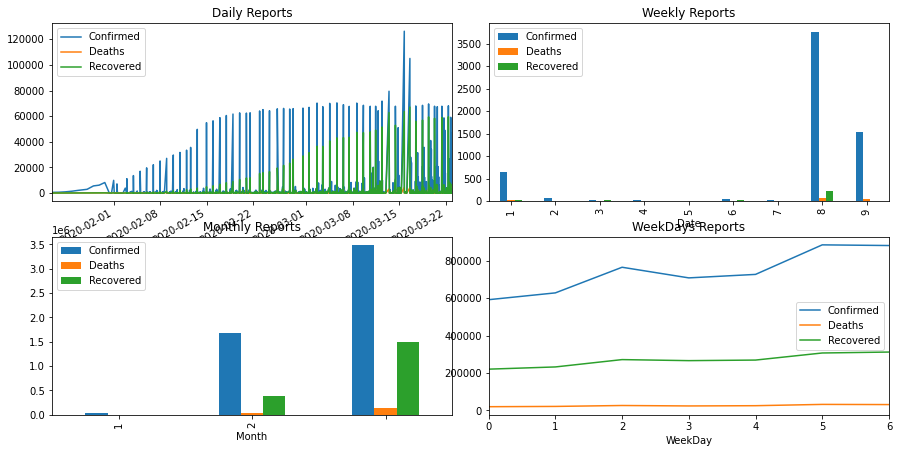

In [69]:
displayed_cols = ['Confirmed','Deaths','Recovered']
def multi_plot():
    fig = plt.figure(constrained_layout=True, figsize=(15,8))
    grid = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)

    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Daily Reports')
    corona_chan.groupby(['Date']).sum()[displayed_cols].plot(ax=ax1)

    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('Monthly Reports')
    corona_chan.groupby(['Month']).sum()[displayed_cols].plot(kind='bar',ax=ax2)
    ax2.set_xticklabels(range(1,3))

    ax3= fig.add_subplot(grid[0, 2:])
    ax3.set_title('Weekly Reports')
    weekdays = corona_chan.groupby('Week').nth(-1)['Date']
    corona_chan[corona_chan['Date'].isin(weekdays)].groupby('Date')[displayed_cols].sum().plot(kind='bar',ax=ax3)
    ax3.set_xticklabels(range(1,len(weekdays)+1))

    ax4 = fig.add_subplot(grid[1, 2:])
    ax4.set_title('WeekDays Reports')
    corona_chan.groupby(['WeekDay']).sum()[displayed_cols].plot(ax=ax4)
    plt.show()
multi_plot()

In [0]:
recent_date = corona_chan['Date'].max()
last_updated = corona_chan[corona_chan['Date'].dt.date == recent_date]

In [71]:
recent_date

Timestamp('2020-03-22 23:43:03')

In [72]:
last_updated.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Date,Day,Month,Week,WeekDay
6426,Hubei,China,2020-03-22 09:43:06,67800.0,3144.0,59433.0,30.9756,112.2707,2020-03-22 09:43:06,22,3,12,6
6427,NaN,Italy,2020-03-22 18:13:20,59138.0,5476.0,7024.0,41.8719,12.5674,2020-03-22 18:13:20,22,3,12,6
6428,NaN,Spain,2020-03-22 23:13:18,28768.0,1772.0,2575.0,40.4637,-3.7492,2020-03-22 23:13:18,22,3,12,6
6429,NaN,Germany,2020-03-22 23:43:02,24873.0,94.0,266.0,51.1657,10.4515,2020-03-22 23:43:02,22,3,12,6
6430,NaN,Iran,2020-03-22 14:13:06,21638.0,1685.0,7931.0,32.4279,53.6880,2020-03-22 14:13:06,22,3,12,6


In [73]:
# No of days
corona_chan['Date'].max() - corona_chan['Date'].min()

Timedelta('60 days 06:43:03')

In [74]:
pd.DataFrame(corona_chan['Country/Region'].value_counts()).style.set_table_styles(
[{'selector': 'tr:nth-of-type(-n+5)',
  'props': [('background', '#FFA500')]}, 
 {'selector': 'th',
  'props': [('background', '#606060'), 
            ('color', 'white'),
            ('font-family', 'verdana')]}
]
)

,Country/Region
US,1617
Mainland China,1517
China,396
Australia,323
Canada,254
France,127
Thailand,61
Japan,61
Singapore,60
Malaysia,59


In [75]:
corona_chan['Country/Region'].replace({'Mainland China':'China'},inplace=True)
last_updated['Country/Region'].replace({'Mainland China':'China'},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
zeroConfirmed = corona_chan[corona_chan['Confirmed'] == 0]
corona_chan = corona_chan[corona_chan['Confirmed'] != 0]

In [77]:
corona_chan.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Date,Day,Month,Week,WeekDay
0,Hubei,China,2020-03-13 11:09:03,67786.0,3062.0,51553.0,30.9756,112.2707,2020-03-13 11:09:03,13,3,11,4
1,Guangdong,China,2020-03-13 11:09:03,1356.0,8.0,1296.0,23.3417,113.4244,2020-03-13 11:09:03,13,3,11,4
2,Henan,China,2020-03-11 08:13:09,1273.0,22.0,1249.0,33.8820,113.6140,2020-03-11 08:13:09,11,3,11,2
3,Zhejiang,China,2020-03-12 01:33:02,1215.0,1.0,1197.0,29.1832,120.0934,2020-03-12 01:33:02,12,3,11,3
4,Hunan,China,2020-03-13 11:09:03,1018.0,4.0,1005.0,27.6104,111.7088,2020-03-13 11:09:03,13,3,11,4


In [78]:
corona_chan[corona_chan['Date'] != corona_chan['Last Update']]['Country/Region'].value_counts()

Series([], Name: Country/Region, dtype: int64)

In [79]:
corona_chan['Last Update'].max()

Timestamp('2020-03-22 23:43:03')

In [80]:
# missing values
corona_chan.isnull().sum()

Province/State    3383
Country/Region       0
Last Update          0
Confirmed           19
Deaths             441
Recovered          388
Latitude          2798
Longitude         2798
Date                 0
Day                  0
Month                0
Week                 0
WeekDay              0
dtype: int64

In [81]:
confirmedCase = int(last_updated['Confirmed'].sum())
deathCase = int(last_updated['Deaths'].sum())
recoveredCase = int(last_updated['Recovered'].sum())
print("Confirmed cases globally " + str(confirmedCase))
print("Recovered case globally " + str(recoveredCase))
print("Death case globally " + str(deathCase))

Confirmed cases globally 329053
Recovered case globally 92669
Death case globally 14554


In [0]:
# Seperate China from others
others = corona_chan[corona_chan['Country/Region']!='China']
last_updated_others = last_updated[last_updated['Country/Region']!='China']
china = corona_chan[corona_chan['Country/Region']=='China']
last_updated_china = last_updated[last_updated['Country/Region']=='China']

In [83]:
last_updated_others.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Date,Day,Month,Week,WeekDay
6427,NaN,Italy,2020-03-22 18:13:20,59138.0,5476.0,7024.0,41.8719,12.5674,2020-03-22 18:13:20,22,3,12,6
6428,NaN,Spain,2020-03-22 23:13:18,28768.0,1772.0,2575.0,40.4637,-3.7492,2020-03-22 23:13:18,22,3,12,6
6429,NaN,Germany,2020-03-22 23:43:02,24873.0,94.0,266.0,51.1657,10.4515,2020-03-22 23:43:02,22,3,12,6
6430,NaN,Iran,2020-03-22 14:13:06,21638.0,1685.0,7931.0,32.4279,53.6880,2020-03-22 14:13:06,22,3,12,6
6431,France,France,2020-03-22 23:43:02,16018.0,674.0,2200.0,46.2276,2.2137,2020-03-22 23:43:02,22,3,12,6


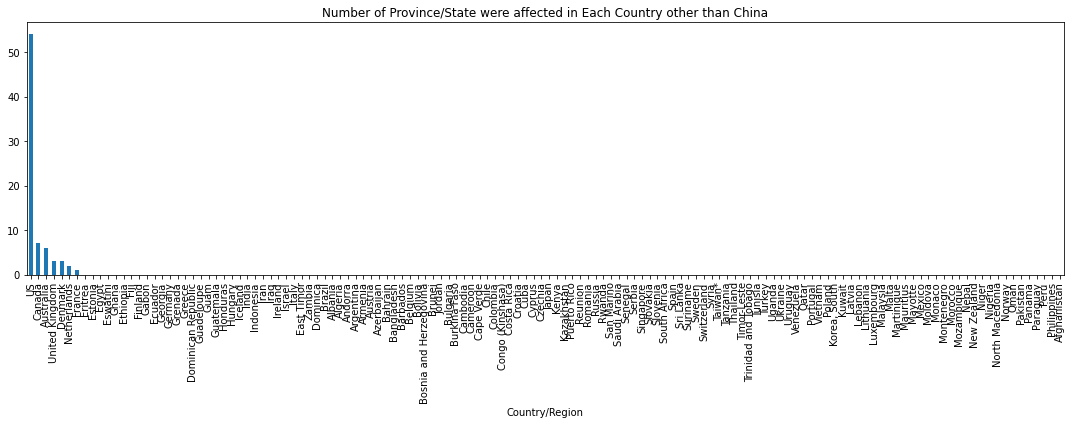

In [84]:
plt.figure(figsize=(15,6))
plt.title('Number of Province/State were affected in Each Country other than China')
plt.xticks(rotation=90)
prv_lst = last_updated_others.groupby(['Country/Region'])['Province/State'].nunique().sort_values(ascending=False)
prv_lst.plot(kind='bar')
plt.tight_layout()

To be noted: Majority of the countries do not have their Province/State updated

In [85]:
prv_lst.tail()

Country/Region
Panama         0
Paraguay       0
Peru           0
Philippines    0
Afghanistan    0
Name: Province/State, dtype: int64

In [86]:
top5 = last_updated_others.groupby(['Country/Region']).sum().nlargest(5,['Confirmed'])[displayed_cols]
top5
print("Top 5 Countries were affected most")
print(top5)

Top 5 Countries were affected most
                Confirmed  Deaths  Recovered
Country/Region                              
Italy             59138.0  5476.0     7024.0
US                33193.0   417.0      178.0
Spain             28768.0  1772.0     2575.0
Germany           24873.0    94.0      266.0
Iran              21638.0  1685.0     7931.0


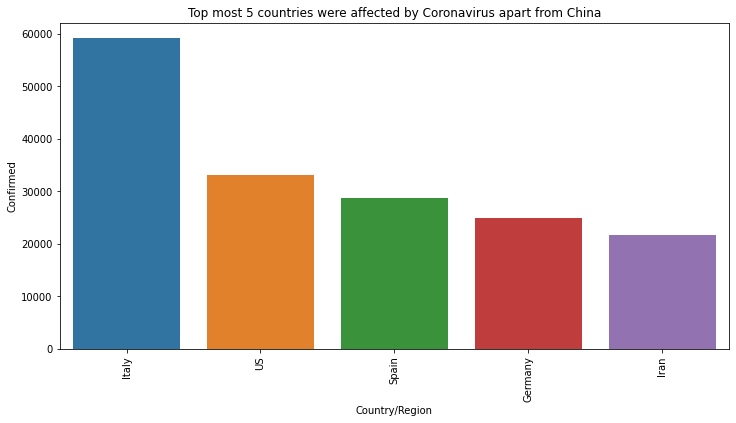

In [87]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title("Top most 5 countries were affected by Coronavirus apart from China")
sns.barplot(x=top5.index,y='Confirmed',data=top5)
plt.show()

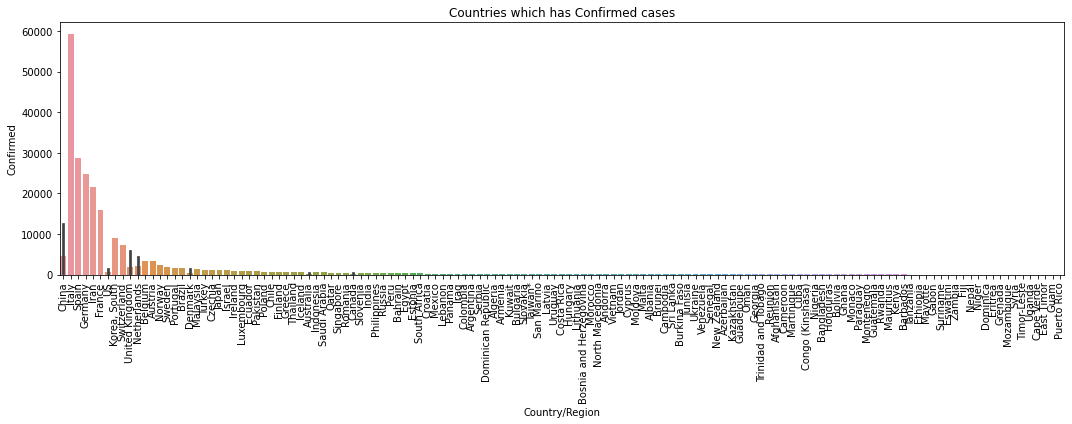

In [88]:
plt.figure(figsize=(15,6))
plt.title('Countries which has Confirmed cases')
plt.xticks(rotation=90)
sns.barplot(x='Country/Region',y='Confirmed',data=last_updated)
plt.tight_layout()

In [89]:
last_updated.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Date,Day,Month,Week,WeekDay
6426,Hubei,China,2020-03-22 09:43:06,67800.0,3144.0,59433.0,30.9756,112.2707,2020-03-22 09:43:06,22,3,12,6
6427,NaN,Italy,2020-03-22 18:13:20,59138.0,5476.0,7024.0,41.8719,12.5674,2020-03-22 18:13:20,22,3,12,6
6428,NaN,Spain,2020-03-22 23:13:18,28768.0,1772.0,2575.0,40.4637,-3.7492,2020-03-22 23:13:18,22,3,12,6
6429,NaN,Germany,2020-03-22 23:43:02,24873.0,94.0,266.0,51.1657,10.4515,2020-03-22 23:43:02,22,3,12,6
6430,NaN,Iran,2020-03-22 14:13:06,21638.0,1685.0,7931.0,32.4279,53.6880,2020-03-22 14:13:06,22,3,12,6


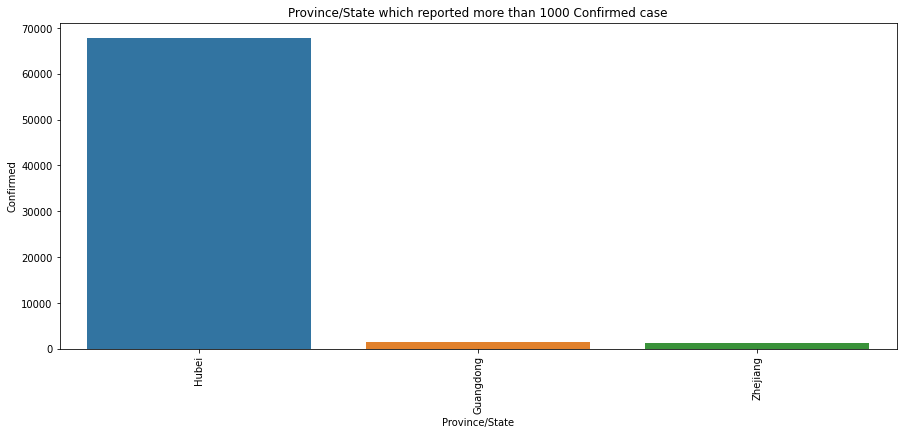

In [90]:
plt.figure(figsize=(15,6))
plt.title('Province/State which reported more than 1000 Confirmed case')
plt.xticks(rotation=90)
prvinc = last_updated_china
prvincConfirmed = prvinc[prvinc['Confirmed']>1000]
prvincConfirmed.head()
sns.barplot(data=prvincConfirmed, x='Province/State', y='Confirmed')

In [91]:
prvincConfirmed['Country/Region'].value_counts()

China    3
Name: Country/Region, dtype: int64

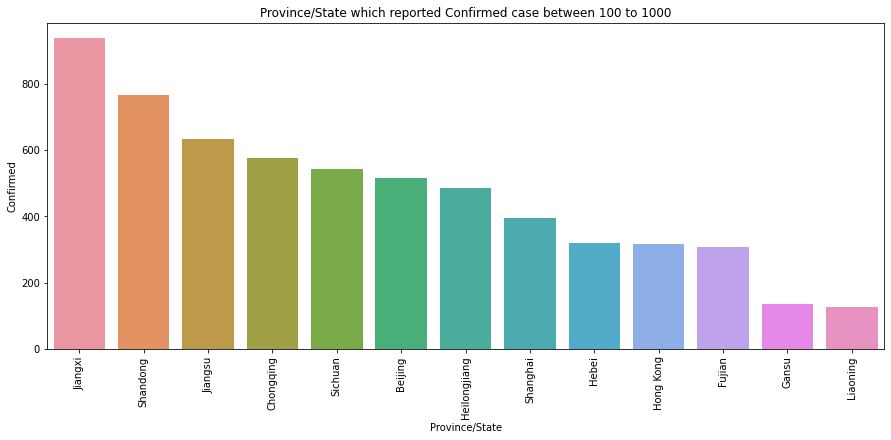

In [92]:
plt.figure(figsize=(15,6))
plt.title('Province/State which reported Confirmed case between 100 to 1000')
plt.xticks(rotation=90)
prvinc = last_updated_china
prvincConfirmed = prvinc[(prvinc['Confirmed']>100)&(prvinc['Confirmed']<1000)]
sns.barplot(data=prvincConfirmed, x='Province/State', y='Confirmed')

In [93]:
prvincConfirmed['Country/Region'].value_counts()

China    13
Name: Country/Region, dtype: int64

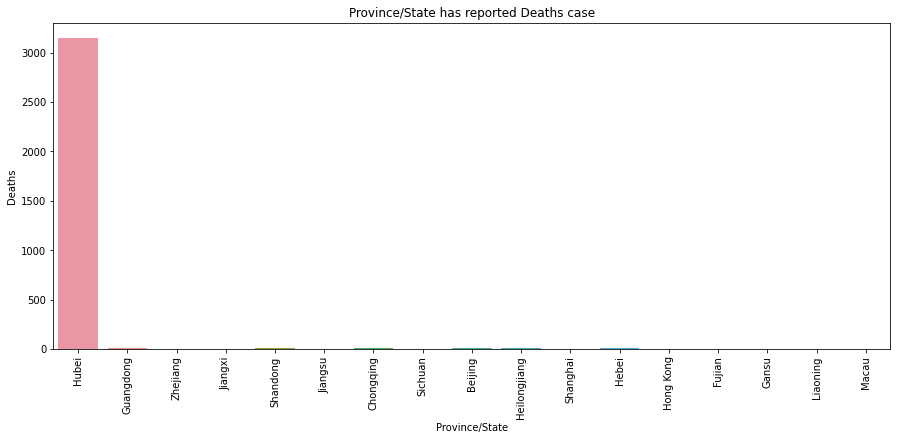

In [94]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.title('Province/State has reported Deaths case')
sns.barplot(data=last_updated_china, x='Province/State', y='Deaths')